# libs

In [2]:
import os
import pandas as pd
import tqdm
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import multiprocessing as mp
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from utils.text_preprocessing import *

# prepare datasets

In [3]:
df = pd.read_csv('./dataset-prepared-data/title-body-reddit.csv')

reddit_tb = df['topic'].str.lower().unique()

df.topic = df.topic.str.lower()
df = df.drop_duplicates('text')
df['source'] = 'title-body-reddit.csv'

df2 = pd.read_csv('./dataset-prepared-data/comments-reddit.csv')

reddit_cm = df2.topic.str.lower().unique()
df2.topic = df2.topic.str.lower()
df2 = df2.drop_duplicates('text')
df2['source'] = 'comments-reddit.csv'

df3 = pd.read_csv('./dataset-prepared-data/self-dialogue.csv')

selfdial = df3.topic.str.lower().unique()

df3 = df3.drop_duplicates('text')
df3['source'] = 'self-dialogue.csv'

df4 = pd.read_csv('./dataset-prepared-data/ccpe.csv')
ccpe = df4.topic.unique()

df4 = df4.drop_duplicates('text')

df4['source'] = 'ccpe.csv'

df5 = pd.read_csv('./dataset-prepared-data/multiwoz.csv')

df5.topic = df5.topic.str.replace("nan, ",'').str.replace('nan','').str.replace(' ','')

df5.topic = df5.topic.apply(eval).apply(lambda x:list(set(x)))

df5.topic = df5.topic.astype(str)

df5 = df5.drop_duplicates(subset=['text','topic'])

df5 = df5[df5.topic!='[]']

df5.topic = df5.topic.str.lower()

multiwoz = df5.topic.apply(eval).explode().unique()

df5.topic = df5.topic.apply(eval)

df5 = df5.explode('topic')
 
df5['source'] = 'multiwoz'

In [158]:
df6 = pd.read_csv('./dataset-prepared-data/medium.csv')

df6.topic = df6.topic.str.lower()

df6.topic = df6.topic.apply(eval).apply(lambda x:list(set(x)))

df6.origin_topic = df6.origin_topic.apply(eval).apply(lambda x:list(set(x)))

df6 = df6[df6.topic.astype(str)!= "['no label']"]

df6 = df6.explode('topic')

df6 = df6[df6.topic!='no label']

medium = df6.topic.unique()

df6['source'] = 'medium'

df6_fam = df6[df6.topic=="family&relationships"]
df6_fam = df6_fam[df6_fam.origin_topic.astype(str).isin(["['relationships']","['parenting']","['relationships', 'love']"])]

from langdetect import detect

lang = list()
for i in tqdm.tqdm_notebook(df6_fam.text.values):
    try:
        lang.append(detect(i))
    except:
        lang.append('err')

df6_fam = df6_fam.drop_duplicates('text')
df6_fam = df6_fam.dropna()
df6_fam = df6_fam[df6_fam.text!='']
df6_fam.text = df6_fam.text.astype(str)
df6_fam['lang'] = lang

df6_fam = df6_fam[df6_fam.lang=='en'][['text', 'topic', 'origin_topic', 'source']]

  0%|          | 0/19776 [00:00<?, ?it/s]

In [173]:
df6 = pd.read_csv('./dataset-prepared-data/medium.csv')

df6.topic = df6.topic.str.lower()

df6.topic = df6.topic.apply(eval).apply(lambda x:list(set(x)))

df6.origin_topic = df6.origin_topic.apply(eval).apply(lambda x:list(set(x)))

df6 = df6[df6.topic.astype(str)!= "['no label']"]

df6 = df6.explode('topic')

df6 = df6[df6.topic!='no label']

medium = df6.topic.unique()

df6['source'] = 'medium'
df6 = df6[df6.origin_topic.astype(str).isin(["['education']","['college']",
                                             "['college', 'education']"])]

lang = list()
for i in tqdm.tqdm_notebook(df6.text.values):
    try:
        lang.append(detect(i))
    except:
        lang.append('err')

df6 = df6.drop_duplicates('text')
df6 = df6.dropna()
df6 = df6[df6.text!='']
df6.text = df6.text.astype(str)
df6['lang'] = lang

df6 = df6[df6.lang=='en'][['text', 'topic', 'origin_topic', 'source']]

  0%|          | 0/18939 [00:00<?, ?it/s]

In [8]:

df7 = pd.read_csv('./dataset-prepared-data/amazon-reviews.csv')

l = list((df7.topic + '....' + df7.origin_topic).unique())

l_map = dict()
for i in l:
    l_map[i.split('....')[1]]=i.split('....')[0]

l_map['Kindle Store'] = 'books&literature'
l_map['Automotive'] = 'personaltransport'
l_map['CDs and Vinyl'] = 'music'
l_map['Office Products'] = 'office'

df7['topic'] = df7['origin_topic'].map(l_map)

amazon = df7.topic.unique()

df7 = df7.drop_duplicates('text')

df7['source'] = 'amazon'

In [9]:
df.topic = df.topic.apply(lambda x: 'disasters' if x=='disaster' else x)

res.topic = res.topic.apply(lambda x: 'gadgets' if x=='gadjets' else x)

df.topic = df.topic.apply(lambda x: 'movies&tv' if x=='movies' else x)

res = pd.DataFrame()
for i in [df, df2, df3, df4, df5,df7]:
    res = pd.concat([res, i[list(df.columns)]])

res = res.drop_duplicates('text')

# add circa depression and clothes

In [32]:
df1 = pd.read_csv('./dataset-prepared-data/circa.csv')
df1['source'] = 'circa.csv'

df2 = pd.read_csv('./dataset-prepared-data/depression.csv')
df2['source'] = 'depression.csv'

df3 = pd.read_csv('./dataset-prepared-data/women-clothes.csv')
df3['source'] = 'women-clothes.csv'

for i in [df, df1, df2, df3]:
    res = pd.concat([res, i[list(res.columns)]])

# rename topics

In [35]:
t = ['artificialintelligence',
 'celebrities&events',
 'depression',
       'disasters', 'finance', 'job', 'psychology', 'religion', 'space',
       'music', 'movies&tv', 'sports', 'clothes', 'masstransit', 'food',
       'leisure', 'health&medicine', 'politics', 'books&literature',
       'science&technology', 'education', 'family&relationships', 'news',
       'travel', 'gadgets', 'animals&pets', 'videogames', 'beauty',
       'garden', 'toys&games', 'personaltransport', 'home&design',
       'art&hobbies']

tt = dict()
for i in t:
    tt[i]=i[0].upper()+i[1:]

In [186]:
mapper = {'artificialintelligence': 'ArtificialIntelligence',
 'celebrities&events': 'Celebrities&Events',
 'celebrities': 'Celebrities&Events',          
 'depression': 'Depression',
 'disasters': 'Disasters',
 'disaster': 'Disasters',          
 'finance': 'Finance',
 'job': 'Job',
 'psychology': 'Psychology',
 'religion': 'Religion',
 'space': 'Space',
 'music': 'Music',
 'movies&tv': 'Movies&Tv',
 'sports': 'Sports',
 'clothes': 'Clothes',
 'masstransit': 'MassTransit',
 'food': 'Food',
 'leisure': 'Leisure',
 'health&medicine': 'Health&Medicine',
 'politics': 'Politics',
 'books&literature': 'Books&Literature',
 'science&technology': 'Science&Technology',
 'education': 'Education',
 'family&relationships': 'Family&Relationships',
 'news': 'News',
 'travel': 'Travel',
 'gadgets': 'Gadgets',
 'animals&pets': 'Animals&Pets',
 'videogames': 'Videogames',
 'beauty': 'Beauty',
 'garden': 'Garden',
 'toys&games': 'Toys&Games',
 'personaltransport': 'PersonalTransport',
 'home&design': 'Home&Design',
 'art&hobbies': 'Art&Hobbies'}

In [38]:
%%time
res['topic'] = res['topic'].map(mapper)

CPU times: user 537 ms, sys: 97.6 ms, total: 634 ms
Wall time: 623 ms


# add celebs-reddit and yelp

In [42]:
%%time
pdf1 = pd.read_csv('./dataset-prepared-data/celebs-reddit.csv')
pdf1['source'] = 'celebs-reddit.csv'

pdf2 = pd.read_csv('./dataset-prepared-data/yelp_5topics.csv')
pdf2['source'] = 'yelp_5topics.csv'

pdf = pd.concat([pdf1,pdf2])

CPU times: user 4.61 s, sys: 939 ms, total: 5.55 s
Wall time: 11 s


In [43]:
res = res[pdf.columns]

In [44]:
res = pd.concat([pdf,res])

In [46]:
res.to_csv('./dataset-train-data/dataset_v6.csv', index=False)

# preproccessing

In [4]:
res = pd.read_csv('./dataset-train-data/dataset_v6.csv')

res = res.reset_index(drop=True)

res = res.drop_duplicates('text')

res.text = res.text.astype(str)

In [21]:
%%time
res = main(res, 'text', 'new_text')

text preprocessed
CPU times: user 15.1 s, sys: 12.1 s, total: 27.2 s
Wall time: 6min 29s


# убираем ревью из спорта

In [38]:
res = res[((res.topic=='Sports') & (res.source=='amazon'))==False]

# убираем ревью из Science&Technology

In [43]:
res[res.topic=='Science&Technology'].source.value_counts()

amazon    65088
Name: source, dtype: int64

In [44]:
res = res[((res.topic=='Science&Technology') & (res.source=='amazon'))==False]

# убираем оригинальный топик про электронику из Gadgets

In [60]:
res = res[((res.topic=='Gadgets') & (res.origin_topic=='Electronics'))==False]

# + new data from reddit

In [150]:
df1 = pd.read_csv('./dataset-prepared-data/reddit-news-politics-relation.csv')
df2 = pd.read_csv('./dataset-prepared-data/reddit-videogames.csv')
df3 = pd.read_csv('./dataset-prepared-data/reddit-science-tech.csv')

In [151]:
res = pd.concat([res,df1, df2, df3])

In [177]:
res.topic.value_counts().shape

(34,)

# + education from medium

In [176]:
res = pd.concat([res, df6])

# final dataset

In [184]:
res.topic = res.topic.str.lower()

In [191]:
res.topic = res.topic.map(mapper)

# family and relationships добавим отобранные тексты из медиума

In [145]:
res = pd.concat([res,df6_fam])

# стандартный препроцессинг который для всех текстов

In [230]:
%%time
res = main(res, 'text', 'text')

text preprocessed
CPU times: user 23.1 s, sys: 20.1 s, total: 43.2 s
Wall time: 59.2 s


In [ ]:
res.to_csv('./dataset-train-data/dataset_v6.csv', index=False)

#  препроцессинг для отбора текстов

In [4]:
%%time
res = pd.read_csv('./dataset-train-data/dataset_v6.csv')

CPU times: user 23.3 s, sys: 4.49 s, total: 27.8 s
Wall time: 51.3 s


In [7]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:           23Gi       3.6Gi        16Gi        72Mi       2.9Gi        19Gi
Swap:         6.0Gi       364Mi       5.6Gi


#    text = remove_emoticons(text)
#    text = remove_emoji(text)

#    text = remove_punctuation(text)

In [5]:
%%time
res.text.apply(type).value_counts()
res = res[res.text.isna()==False]

CPU times: user 2.73 s, sys: 218 ms, total: 2.95 s
Wall time: 2.95 s


In [6]:
%%time
res = main(df=res, col1='text', col2='new_text')

text preprocessed
CPU times: user 10.8 s, sys: 10.5 s, total: 21.3 s
Wall time: 4min 45s


# токенизация

In [7]:
from nltk.tokenize import word_tokenize

def tokenize_(text):
    return ' '.join(word_tokenize(text))

In [8]:
%%time
res.new_text = res.new_text.str.lower()

CPU times: user 5.98 s, sys: 1.25 s, total: 7.23 s
Wall time: 7.22 s


In [9]:
%%time
with mp.Pool(mp.cpu_count()) as pool:
    res['new_text'] = pool.map(tokenize_, res['new_text']) 

CPU times: user 12.2 s, sys: 10.8 s, total: 23 s
Wall time: 4min 52s


##  удалим стоп слова до лемматизации

In [10]:
%%time
with mp.Pool(mp.cpu_count()) as pool:
    res['new_text'] = pool.map(remove_stopwords, res['new_text'])

CPU times: user 8.48 s, sys: 7.47 s, total: 16 s
Wall time: 25.6 s


# лемматизация

In [11]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()

def lemma_(text):
    text = text.split(' ')
    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

In [12]:
%%time
with mp.Pool(mp.cpu_count()) as pool:
    res['new_text'] = pool.map(lemma_, res['new_text'])

CPU times: user 7.54 s, sys: 5.32 s, total: 12.9 s
Wall time: 1min 40s


# снова удалим стоп слова

In [13]:
%%time
with mp.Pool(mp.cpu_count()) as pool:
    res['new_text'] = pool.map(remove_stopwords, res['new_text']) 

CPU times: user 7.63 s, sys: 5.52 s, total: 13.1 s
Wall time: 13.9 s


In [19]:
res.to_csv('./dataset-train-data/dataset_v6_with_new_text.csv', index=False)

In [3]:
res = pd.read_csv('./dataset-train-data/dataset_v6_with_new_text.csv')

In [4]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:           23Gi       9.9Gi       5.9Gi       238Mi       7.6Gi        12Gi
Swap:         6.0Gi       149Mi       5.9Gi


In [ ]:
%%time
res['lens'] = res.new_text.str.split().apply(len)

In [6]:
res.topic.unique()

array(['Travel', 'MassTransit', 'Leisure', 'Beauty', 'Health&Medicine',
       'ArtificialIntelligence', 'Depression', 'Disasters', 'Finance',
       'Job', 'Psychology', 'Religion', 'Space', 'Music', 'Movies&Tv',
       'Sports', 'Clothes', 'Food', 'Books&Literature', 'Videogames',
       'Garden', 'Toys&Games', 'PersonalTransport', 'Home&Design',
       'Gadgets', 'Art&Hobbies', 'Animals&Pets', 'Family&Relationships',
       'News', 'Politics', 'Science&Technology', 'Education',
       'Celebrities&Events'], dtype=object)

# 'Celebrities&Events'

In [32]:
pd.set_option('display.max_colwidth', 200)

In [101]:
test = res[res.topic=='Celebrities&Events']

test = test[(test.lens>5) & (test.lens<100)]

test = test[test.source=='celebs-reddit.csv']

test = test.drop_duplicates('text')

In [102]:
res = pd.concat([res[res.topic!='Celebrities&Events'],test])

# Travel

In [104]:
test = res[res.topic=='Travel']

test = test[(test.lens>5) & (test.lens<70)]

res[(res.lens>6) & (res.old_lens<70)]

import json

temp = list()
for path in ['review_quote_USonly.json',
'review_content_world.json',
'review_content_USonly.json',
'review_content_USonly.json']:
    
    with open(path, 'r') as j:
         contents = json.loads(j.read())
    for i in contents.keys():
        temp+=contents[i]

temp = pd.DataFrame(temp, columns=['text'])

temp['topic'] = 'Travel'
temp['origin_topic'] = 'museum_review'
temp['source'] = 'museum-data-tripadvizor-kaggle'

In [141]:
%%time
temp['text'] = temp['text'].apply(remove_subreddit_symbol)
temp['text'] = temp['text'].apply(remove_line_breaks)
temp['text'] = temp['text'].apply(remove_double_space)

def temp_preprocessor(text):
    text = remove_emoticons(text)
    text = remove_emoji(text)
    text = remove_punctuation(text)
    text = text.lower()
    text = tokenize_(text)
    text = remove_stopwords(text)
    text = lemma_(text)
    text = remove_stopwords(text)
    #text = remove_top_1000_google(text)
    return text

temp['new_text'] = temp['text'].apply(temp_preprocessor)

temp['lens'] = temp.new_text.str.split().apply(len)

CPU times: user 653 ms, sys: 23.2 ms, total: 677 ms
Wall time: 675 ms


In [151]:
temp = temp[(temp.lens>5) & (temp.lens<70)]

In [154]:
test = test.sample(40_000)

In [156]:
res = pd.concat([test,temp,res[res.topic!='Travel']])

In [157]:
del [temp,test]
import gc
gc.collect()

2463

# kek

In [160]:
res.lens.max()

4095

In [162]:
cd ./topic-classifier/

/data/home/admin/topic-classifier


In [164]:
%%time
res.to_csv('./dataset-train-data/dataset_v6_with_new_text.csv', index=False)

CPU times: user 1min 28s, sys: 4.8 s, total: 1min 33s
Wall time: 1min 34s


In [174]:
res = res[(res.lens>=6) & (res.lens<=70)]

In [176]:
res = res[['text','topic']]

# cut

In [197]:
res.to_csv('./dataset-train-data/dataset_v6_FINAL.csv', index=False)

In [4]:
from nltk.tokenize import word_tokenize

def tt_len(text):
    return len(word_tokenize(text))

In [5]:
%%time
res = pd.read_csv('./dataset-train-data/dataset_v6_FINAL.csv')

CPU times: user 12 s, sys: 1.35 s, total: 13.3 s
Wall time: 13.3 s


In [6]:
import multiprocessing as mp

In [ ]:
%%time
with mp.Pool(mp.cpu_count()) as pool:
        res['lens'] = pool.map(tt_len, res['text'])

In [7]:
top = res.topic.value_counts().reset_index()

In [9]:
bot = top[top.topic<100_000]['index'].tolist()
top = top[top.topic>100_000]['index'].tolist()

In [13]:
bot = res[res.topic.isin(bot)]

In [15]:
top = res[res.topic.isin(top )]

In [23]:
random_state = 123
top_=pd.DataFrame()
for i in top.topic.unique():
    top_ = pd.concat([top[top.topic==i].sample(100_000, random_state=random_state), top_])

In [24]:
down = pd.concat([top_,bot])

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
tr, ts = train_test_split(down, stratify=down['topic'], test_size=0.2, random_state=random_state)

In [32]:
val, ts = train_test_split(ts, stratify=ts['topic'], test_size=0.5, random_state=random_state)

In [35]:
tr.to_csv('./train_test/train_v2.csv',index=False)
val.to_csv('./train_test/val_v2.csv',index=False)
ts.to_csv('./train_test/test_v2.csv',index=False)

In [18]:
ress = res[(res.lens>=6) & (res.lens<=70)]

In [19]:
for i in ress.topic.value_counts().reset_index().values:
    print(str(i[0])+' '+ '-'+' '+str(i[1]))

Books&Literature - 422780
Home&Design - 372993
Music - 358767
Leisure - 301090
Beauty - 242170
Videogames - 195229
Animals&Pets - 192909
Gadgets - 185964
Movies&Tv - 175700
Clothes - 173669
Toys&Games - 160869
Religion - 160144
PersonalTransport - 159699
Garden - 147297
Space - 143521
Food - 141960
Art&Hobbies - 123732
Depression - 83036
Travel - 74394
Health&Medicine - 61268
Science&Technology - 51994
News - 48113
Job - 45428
Disasters - 41152
Politics - 20907
Celebrities&Events - 20623
Psychology - 20461
ArtificialIntelligence - 17088
Family&Relationships - 16937
Finance - 16805
Education - 16672
MassTransit - 12472
Sports - 11148


In [20]:
ress['source'] = ress.source.map(mapper)
t = ress.groupby(['topic', 'source'])['text'].count().reset_index()
t['s'] = t.source+'(' +t.text.astype(str)+ ' texts)'

t = t.groupby('topic')['s'].apply(list).reset_index()

In [21]:
mapper = {'yelp_5topics.csv':'reviews from Yelp',
'museum-data-tripadvizor-kaggle':'Raw Data Scraped from TripAdvisor (US/World), reviews about hotels and restaurants',
'title-body-reddit.csv':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. ',
'comments-reddit.csv':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. ',
'self-dialogue.csv':'The Self-dialogue Corpus - a collection of self-dialogues across music, movies and sports',
'ccpe.csv':'CCPE-M: Coached Conversational Preference Elicitation dataset for Movies', 
'multiwoz':'Multi-Domain Wizard-of-Oz dataset (MultiWOZ), a fully-labeled collection of human-human written conversations spanning over multiple domains and topics', 
'amazon':'Amazon reviews',
'circa.csv':'The CIRCA dataset. The data is collected in 10 different social conversational situations (eg. food preferences of a friend',
'depression.csv':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform.',
'women-clothes.csv': 'women’s Clothing E-Commerce dataset revolving around the reviews written by customers',
'medium':'data from Medium posts(open datasets from kaggle)',
'reddit-title-news-politics-relation':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. ',
'reddit-body-news-politics-relation':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. ',
'reddit-comments-news-politics-relation':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. ',
'reddit-title-videogames':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. ',
'reddit-body-videogames':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. ',
'reddit-comments-videogames':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. ',
'reddit-title-science-tech':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. ',
'reddit-body-science-tech':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. ',
'reddit-comments-science-tech':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. ',
'celebs-reddit.csv':'collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. '}

In [34]:
for i in t.values:
    break
    print('\paragraph' + '{'+ i[0] +'}'+' topic contains samples from ' +str(i[1]).replace('[','').replace(']','').replace("'",''))

In [33]:
for i in t.topic.values:
    break
    print(ress[ress.topic == i].origin_topic.unique())

In [62]:
ress.shape

(4216991, 6)

In [75]:
t = ress.text.str.replace(' ','').apply(len)

<AxesSubplot:xlabel='Text length(symbols)', ylabel='Number of texts'>

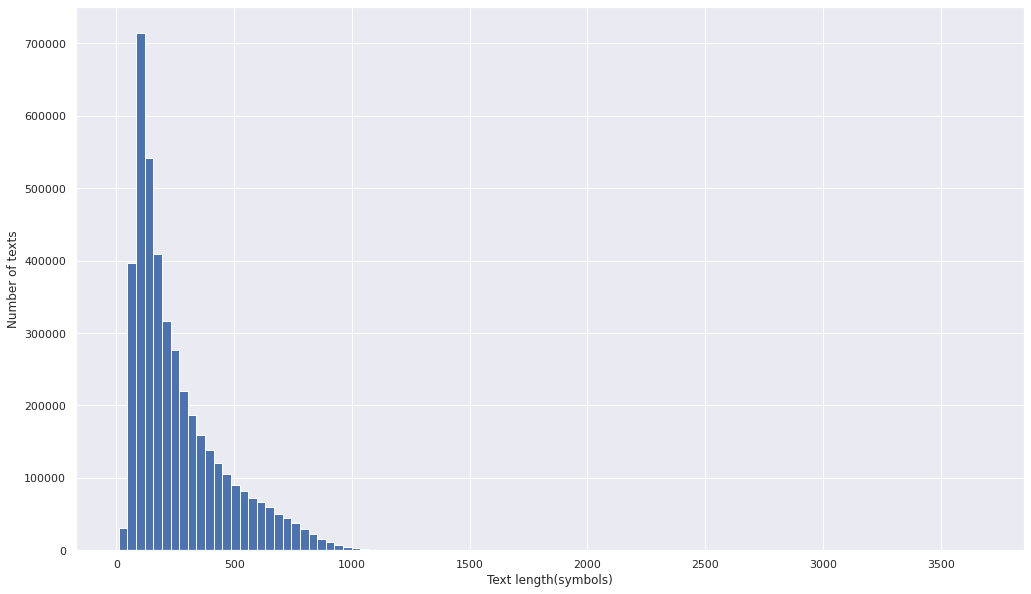

In [96]:
plt.figure(figsize=(17,10))
plt.xlabel('Text length(symbols)')
sns.set(font_scale=.1)
plt.ylabel('Number of texts')
t.hist(bins = 100)